# Part 1: Data Exploration

This notebook explores our dataset, trying to understand the distribution of the labels
and the text content.

In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging


logging.getLogger('fgclassifier').setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
os.chdir('..')

## 1. Data Format and Word Segmentation

First, check how word segmentation works with the library we chose:

In [2]:
from config import valid_data_path, train_data_path
from fgclassifier.utils import read_csv

df = read_csv(train_data_path)

Add user dicct...


2018-11-20 21:09:14,369 [INFO] Reading data/train/sentiment_analysis_trainingset.csv..


In [70]:
from fgclassifier.utils import jieba, stop_words, tokenize, load_user_dict

load_user_dict()
print(stop_words)
print()

sample = df['content'].sample(1).values[0]
print(tokenize(sample, ' / '))
print()
print(sample)

['the', 'of', 'is', 'and', 'to', 'in', 'that', 'we', 'for', 'an', 'are', 'by', 'be', 'as', 'on', 'with', 'can', 'if', 'from', 'which', 'you', 'it', 'this', 'then', 'at', 'have', 'all', 'not', 'one', 'has', 'or', 'that', '的', '了']

开 / 在 / 学校 / 附近 / ， / 车站 / 旁边 / ， / 家 / 对面 / ， / 特别 / 方便 / 。 / 我 / 吃过 / 两次 / 米饭 / ， / 是 / 有点 / 硬硬 / 那种 / ， / 不是 / 特别 / 进味 / ， / 但是 / 分量 / 很大 / 。 / 还点 / 过 / 几次 / periperi / chips / 和 / half / chicken / ， / 这个 / 薯条 / 我 / 觉得 / 特别 / 好吃 / ～ / 这 / 两样 / 东西 / 分量 / 有点 / 大 / ， / 我 / 一般 / 点 / 带回家 / 把 / 薯条 / 吃完 / 然后 / 吃 / 两口 / 鸡 / ， / 剩下 / 还 / 能 / 再 / 吃 / 一顿 / ， / 这样 / 才 / 15.9 / 刀 / ， / 超 / 划算 / 。 / 不过 / 我要 / 虽然 / 是 / extra / hot / 但 / 还是 / 不够 / 味 / ， / 也 / 一点 / 不辣 / 。 / 总之 / 想不到 / 东西 / 吃 / 又 / 不想 / 跑 / 远 / 时候 / ， / 学校 / 附近 / 还是 / 推荐 / 这家 / 。

"开在学校附近，车站旁边，家对面，特别方便。我吃过两次米饭，是有点硬硬的那种，不是特别进味，但是分量很大。还点过几次periperi chips和half chicken，这个薯条我觉得特别好吃～这两样东西分量有点大，我一般点了带回家把薯条吃完然后吃两口鸡，剩下的还能再吃一顿，这样才15.9刀，超划算的。不过我要的虽然是extra hot但还是不够味，也一点不辣。总之想不到东西吃又不想跑远了的时候，学校附近还是推荐这家。"


In [26]:
from fgclassifier.utils import tokenize

# Replace blank space with some materialized words
txt = """
【位置交通】

南城，草桥首地大峡谷购物中心4层，交通还算便利，附近没有特别近的地铁，距离草桥地铁站还要走上一段时间，不过公交很发达，很多公交车都经过这里，三环路，你懂的。

【环境】

店内干净整洁，装修很显格调，店内巨大海报可以看到招牌泼辣鸡，桌椅很显档次，店铺面积很大，两人位和四人位分区布置，整体还不错。

【服务】
"""
print(jieba.lcut(txt))
print('')
print(tokenize(txt, ' / '))

['\n', '【', '位置', '交通', '】', '\n', '\n', '南城', '，', '草桥', '首地', '大峡谷', '购物中心', '4', '层', '，', '交通', '还算', '便利', '，', '附近', '没有', '特别', '近', '的', '地铁', '，', '距离', '草桥', '地铁站', '还要', '走上', '一段时间', '，', '不过', '公交', '很', '发达', '，', '很多', '公交车', '都', '经过', '这里', '，', '三环路', '，', '你', '懂', '的', '。', '\n', '\n', '【', '环境', '】', '\n', '\n', '店内', '干净', '整洁', '，', '装修', '很显', '格调', '，', '店内', '巨大', '海报', '可以', '看到', '招牌', '泼辣', '鸡', '，', '桌椅', '很显', '档次', '，', '店铺', '面积', '很大', '，', '两人位', '和', '四人位', '分区', '布置', '，', '整体', '还不错', '。', '\n', '\n', '【', '服务', '】', '\n']

位置 / 交通 / 】 / 南城 / ， / 草桥 / 首地 / 大峡谷 / 购物中心 / 4 / 层 / ， / 交通 / 还算 / 便利 / ， / 附近 / 没有 / 特别 / 近 / 地铁 / ， / 距离 / 草桥 / 地铁站 / 还要 / 走上 / 一段时间 / ， / 不过 / 公交 / 很 / 发达 / ， / 很多 / 公交车 / 都 / 经过 / 这里 / ， / 三环路 / ， / 你 / 懂 / 。 / 环境 / 】 / 店内 / 干净 / 整洁 / ， / 装修 / 很显 / 格调 / ， / 店内 / 巨大 / 海报 / 可以 / 看到 / 招牌 / 泼辣 / 鸡 / ， / 桌椅 / 很显 / 档次 / ， / 店铺 / 面积 / 很大 / ， / 两人位 / 和 / 四人位 / 分区 / 布置 / ， / 整体 / 还不错 / 。 / 服务 / 】


In [4]:
df.iloc[0,:]

id                                                                                          0
content                                     "哎，想当年来佘山的时候，啥都没有，三品香算镇上最大看起来最像样的饭店了。菜品多，有点太多，...
location_traffic_convenience                                                               -2
location_distance_from_business_district                                                   -2
location_easy_to_find                                                                      -2
service_wait_time                                                                           0
service_waiters_attitude                                                                   -2
service_parking_convenience                                                                -2
service_serving_speed                                                                      -2
price_level                                                                                 1
price_cost_effective                                        

## 2. Basic Statistics

First, check how many records we have. As word segmentation takes a while, we read the raw data first.

In [75]:
from config import valid_data_path, train_data_path, testa_data_path, testb_data_path

# Without segmentation, this is faster
df_train_raw = read_csv(train_data_path)
df_valid_raw = read_csv(valid_data_path)
print("Training data:", df_train_raw.shape)
print("Validation data:", df_valid_raw.shape)

2018-11-20 21:35:07,907 [INFO] Reading data/train/sentiment_analysis_trainingset.csv..
2018-11-20 21:35:09,712 [INFO] Reading data/valid/sentiment_analysis_validationset.csv..


Training data: (105000, 22)
Validation data: (15000, 22)


In [76]:
df_testa_raw = read_csv(testa_data_path)
df_testb_raw = read_csv(testb_data_path)
print("Test-A data:", df_testa_raw.shape)
print("Test-B data:", df_testb_raw.shape)

2018-11-20 21:35:10,015 [INFO] Reading data/test-a/sentiment_analysis_testa.csv..
2018-11-20 21:35:10,272 [INFO] Reading data/test-b/sentiment_analysis_testb.csv..


Test-A data: (15000, 22)
Test-B data: (200000, 22)


Let's run word segmentation (tokenization), and see what's the data look like:

In [89]:
from fgclassifier.utils import tokenize_csv, read_data

df_train = tokenize_csv(train_data_path)
df_valid = tokenize_csv(valid_data_path)
df_testa = read_data(testa_data_path)
df_testb = tokenize_csv(testb_data_path)

2018-11-20 22:00:54,614 [WARNING] Tokenized csv already exists. Please use read_data() to read it.
2018-11-20 22:00:54,622 [INFO] Reading data/train/sentiment_analysis_trainingset.csv.tokenized.tsv..
2018-11-20 22:00:57,138 [WARNING] Tokenized csv already exists. Please use read_data() to read it.
2018-11-20 22:00:57,140 [INFO] Reading data/valid/sentiment_analysis_validationset.csv.tokenized.tsv..
2018-11-20 22:00:57,463 [INFO] Reading data/test-a/sentiment_analysis_testa.csv..
2018-11-20 22:00:57,739 [INFO] Segmenting data/test-a/sentiment_analysis_testa.csv..
100%|██████████| 15000/15000 [00:38<00:00, 388.38it/s]
2018-11-20 22:01:36,664 [INFO] Saved to {output}.
2018-11-20 22:01:36,744 [WARNING] Tokenized csv already exists. Please use read_data() to read it.
2018-11-20 22:01:36,745 [INFO] Reading data/test-b/sentiment_analysis_testb.csv.tokenized.tsv..


In [90]:
X_train, y_train = read_data(df_train)
X_train.head()

0    吼吼 吼 ， 萌死 人 棒棒糖 ， 中 大众 点评 霸王餐 ， 太 可爱 。 一直 就 好奇...
1    第三次 参加 大众 点评 网 霸王餐 活动 。 这家 店 给 人 整体 感觉 一般 。 首先...
2    4 人 同行 点 10 个 小吃 榴莲 酥 榴莲 味道 不足 松软 奶味 浓 虾饺 好吃 两...
3    之前 评价 莫名其妙 被删 果断 继续 差评 ！ 换 菜单 价格 更 低 开始 砸牌子 但 ...
4    出乎意料 地 惊艳 ， 椰子 鸡 清热 降火 ， 美容 养颜 ， 大大 满足 爱吃 火锅 怕...
Name: content, dtype: object

In [100]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    token_pattern=r'(?u)\b\w+\b',
    stop_words=[
        '是', '我', '也', '有', '在', '吃', '去',
        '点', '还', '和', '就', '会', '一个', '我们',
        '这个', '个'
    ],
    ngram_range=(1, 5), min_df=0.005,
)
tokenizer = vectorizer.build_tokenizer()

def count_words(content, counter=None):
    counts = counter or Counter()
    sentences = []
    for s in content:
        ss = tokenizer(s)
        sentences.append(ss)
        counts.update(ss)
    return counts, sentences

count_train, sentences = count_words(X_train)

In [101]:
print(count_train.most_common()[:100])

[('是', 262562), ('很', 191686), ('也', 189284), ('吃', 189128), ('我', 151619), ('就', 150826), ('有', 146675), ('都', 127335), ('在', 125185), ('味道', 123895), ('和', 115837), ('不错', 98436), ('感觉', 91393), ('不', 87865), ('还是', 83413), ('去', 81964), ('点', 76304), ('好', 75206), ('没有', 75198), ('还', 74482), ('说', 73171), ('比较', 71995), ('我们', 67480), ('就是', 66941), ('可以', 65918), ('人', 64633), ('来', 61832), ('一个', 60553), ('菜', 59802), ('但是', 57721), ('好吃', 56844), ('还有', 55873), ('喜欢', 54714), ('服务员', 54078), ('上', 53138), ('多', 52718), ('店', 49098), ('要', 49025), ('吧', 47993), ('环境', 47970), ('有点', 47232), ('非常', 46927), ('这家', 46921), ('里面', 46711), ('服务', 44573), ('没', 43280), ('这个', 42849), ('不过', 42698), ('到', 42304), ('不是', 41680), ('特别', 40558), ('觉得', 39321), ('都是', 38727), ('很好', 38095), ('元', 37895), ('啊', 37095), ('又', 37022), ('会', 36786), ('时候', 36561), ('所以', 36493), ('但', 36212), ('真的', 36023), ('口味', 35586), ('一般', 35517), ('因为', 35282), ('很多', 35144), ('给', 34916), ('着', 33787), 

Looks like the tokenizer removed single-character Chinese words, which is not bad per se.

In [102]:
df_train['content'][0]

'吼吼 吼 ， 萌死 人 棒棒糖 ， 中 大众 点评 霸王餐 ， 太 可爱 。 一直 就 好奇 这个 棒棒糖 是 怎么 个 东西 ， 大众 点评 给 我 这个 土老冒 一个 见识 机会 。 看 介绍 棒棒糖 是 用 德国 糖 做的 ， 不会 很甜 ， 中间 照片 是 糯米 ， 能 食用 ， 真是太 高端 大气 上档次 ， 还可以 买 蝴蝶结 扎口 ， 送人 可以 买 礼盒 。 我 是 先 打 卖家 电话 ， 加 微信 ， 给 卖家 传 照片 。 等 几天 ， 卖家 就 告诉 我 可以 取货 ， 去 大官 屯 那取 。 虽然 连 卖家 面 都 没 见到 ， 但是 还是 谢谢 卖家 送 我 这么 可爱 东西 ， 太 喜欢 ， 这 哪 舍得吃 啊 。'

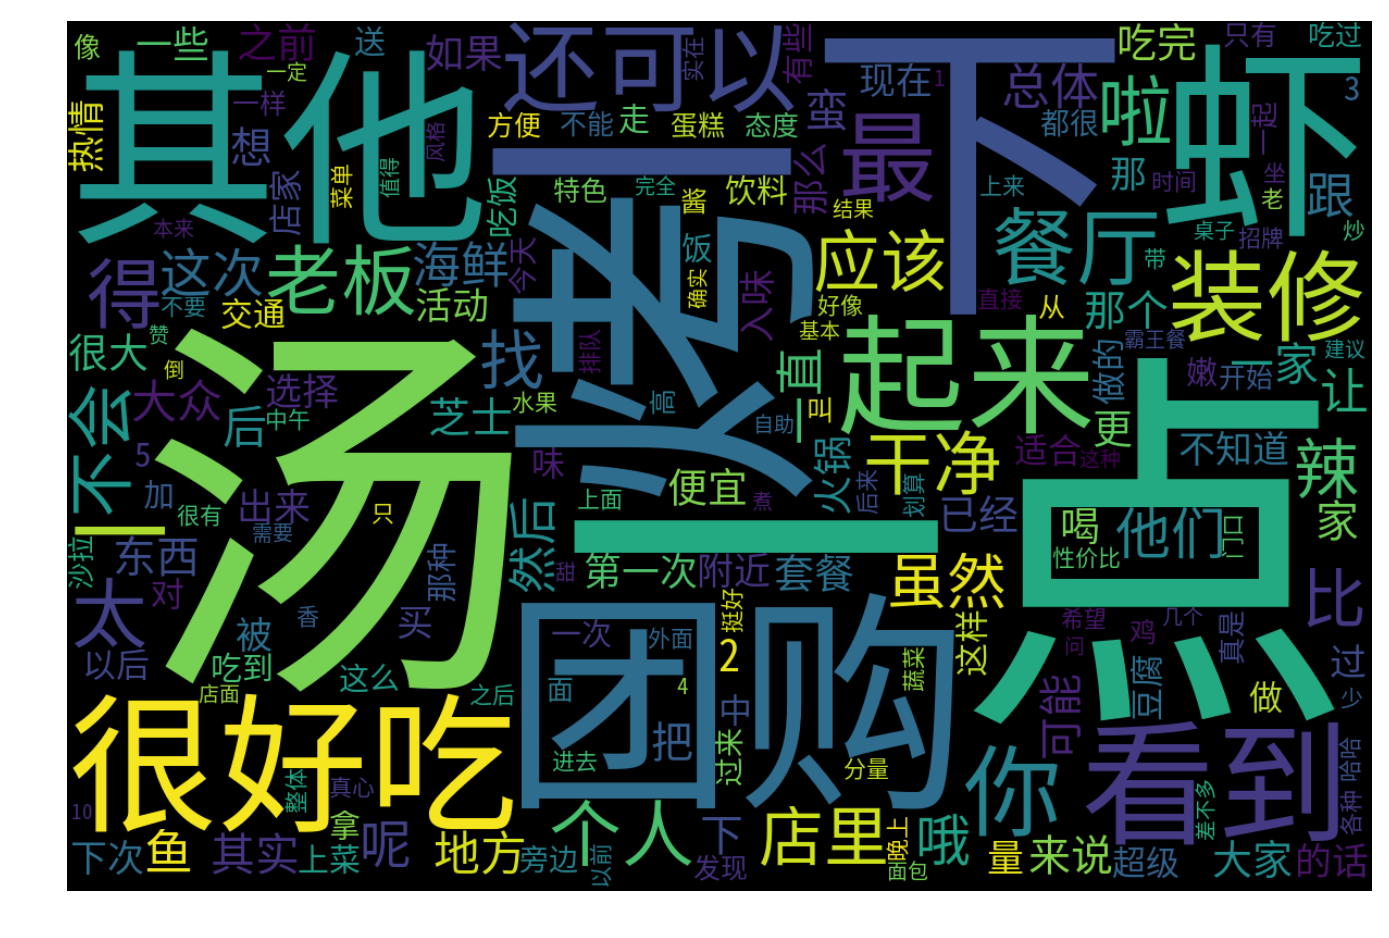

In [105]:
from wordcloud import WordCloud

font = './misc/SourceHanSansHWSC/SourceHanSansHWSC-Regular.otf'
wordcloud = WordCloud(
    font_path=font, width=1200, height=800,
    # background_color='rgb(55, 71, 79)',
).generate_from_frequencies(dict(count_train.most_common()[10:5000]))

plt.figure(figsize=(12, 8))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [104]:
print('Average review length: {}'.format(np.mean([len(s) for s in sentences])))
print('Vocabulary size: {}'.format(len(count_train)))

Average review length: 161.2289904761905
Vocabulary size: 218571


In [106]:
for s in sentences[:3]:
    print(s)

['吼吼', '吼', '萌死', '人', '棒棒糖', '中', '大众', '点评', '霸王餐', '太', '可爱', '一直', '就', '好奇', '这个', '棒棒糖', '是', '怎么', '个', '东西', '大众', '点评', '给', '我', '这个', '土老冒', '一个', '见识', '机会', '看', '介绍', '棒棒糖', '是', '用', '德国', '糖', '做的', '不会', '很甜', '中间', '照片', '是', '糯米', '能', '食用', '真是太', '高端', '大气', '上档次', '还可以', '买', '蝴蝶结', '扎口', '送人', '可以', '买', '礼盒', '我', '是', '先', '打', '卖家', '电话', '加', '微信', '给', '卖家', '传', '照片', '等', '几天', '卖家', '就', '告诉', '我', '可以', '取货', '去', '大官', '屯', '那取', '虽然', '连', '卖家', '面', '都', '没', '见到', '但是', '还是', '谢谢', '卖家', '送', '我', '这么', '可爱', '东西', '太', '喜欢', '这', '哪', '舍得吃', '啊']
['第三次', '参加', '大众', '点评', '网', '霸王餐', '活动', '这家', '店', '给', '人', '整体', '感觉', '一般', '首先', '环境', '只能', '算', '中等', '其次', '霸王餐', '提供', '菜品', '也', '不是', '很多', '当然', '商家', '为了', '避免', '参加', '霸王餐', '吃不饱', '现象', '给', '每桌', '都', '提供', '至少', '六份', '主食', '我们', '那桌', '都', '提供', '两份', '年糕', '第一次', '吃火锅', '会', '在', '桌上', '有', '这么', '多', '主食', '整体', '来说', '这家', '火锅店', '没有', '什么', '特别', '有特色', '不过', '每份', '菜品', '分量', '还是',

In [107]:
df_en = pd.read_csv('data/english.csv')
count_en, reviews_en = count_words(df_en['content'])

Most common: [('the', 158386), ('is', 114688), ('and', 65282), ('to', 54480), ('of', 47492), ('The', 41031), ('it', 36260), ('very', 34925), ('not', 28394), ('are', 27412)]
Average review length: 221.813 words
Vocabulary size: 28043


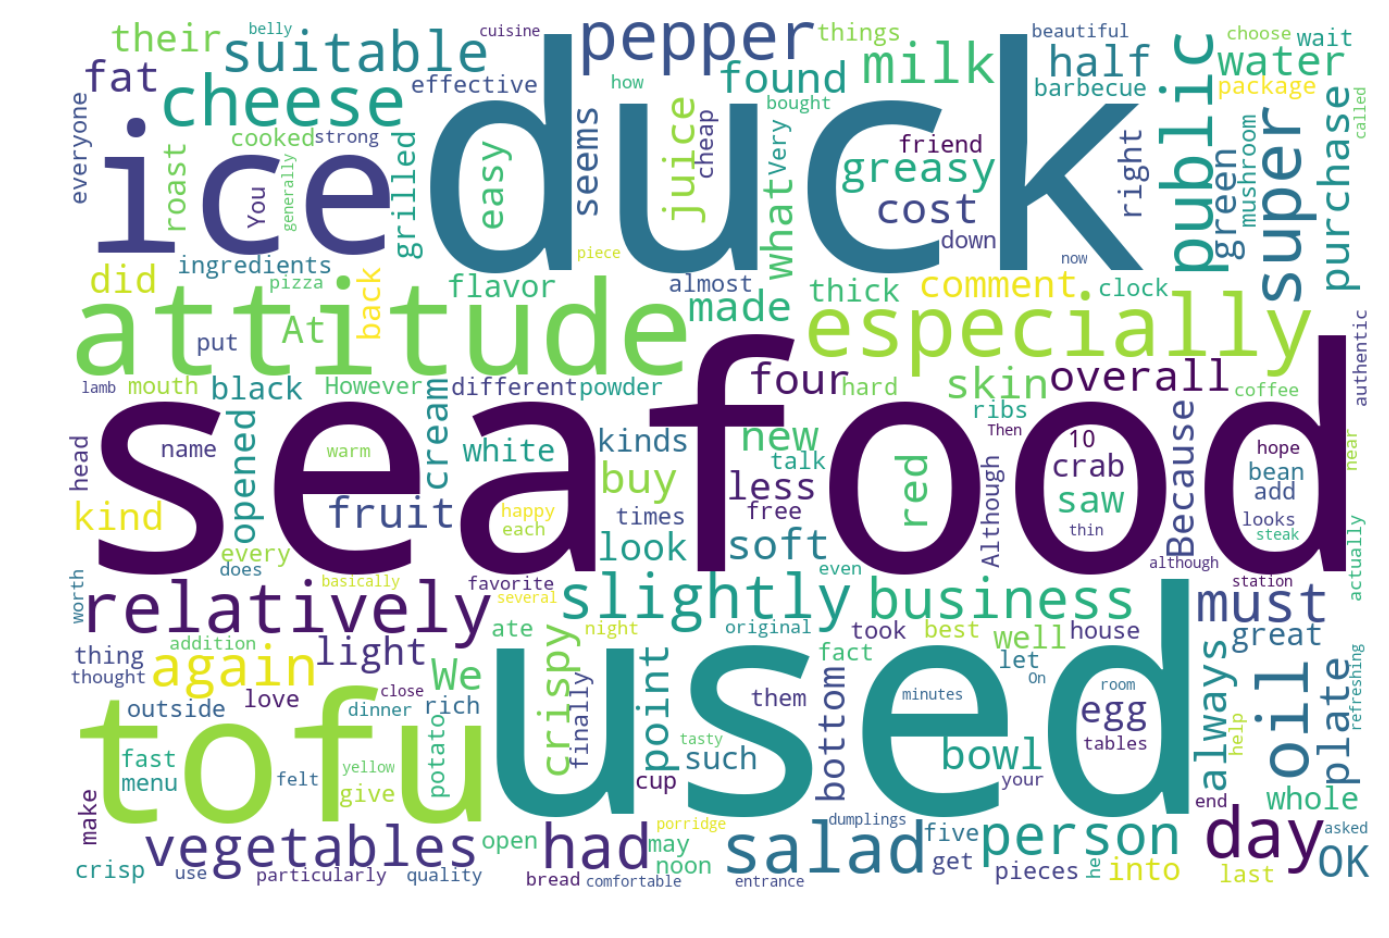

In [33]:
print('Most common: {}'.format(count_en.most_common()[:10]))
print('Average review length: {} words'.format(np.mean([len(s) for s in reviews_en])))
print('Vocabulary size: {}'.format(len(count_en)))

wordcloud = WordCloud(width=1200, height=800,
    background_color='#ffffff',
).generate_from_frequencies(dict(count_en.most_common()[190:10000]))

plt.figure(figsize=(12, 8))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [108]:
import pandas as pd

df = pd.DataFrame({ 'values': list(count_train.values()) })
df.describe()

,values
count,218571.000000
mean,77.453294
std,1604.610784
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,262562.000000


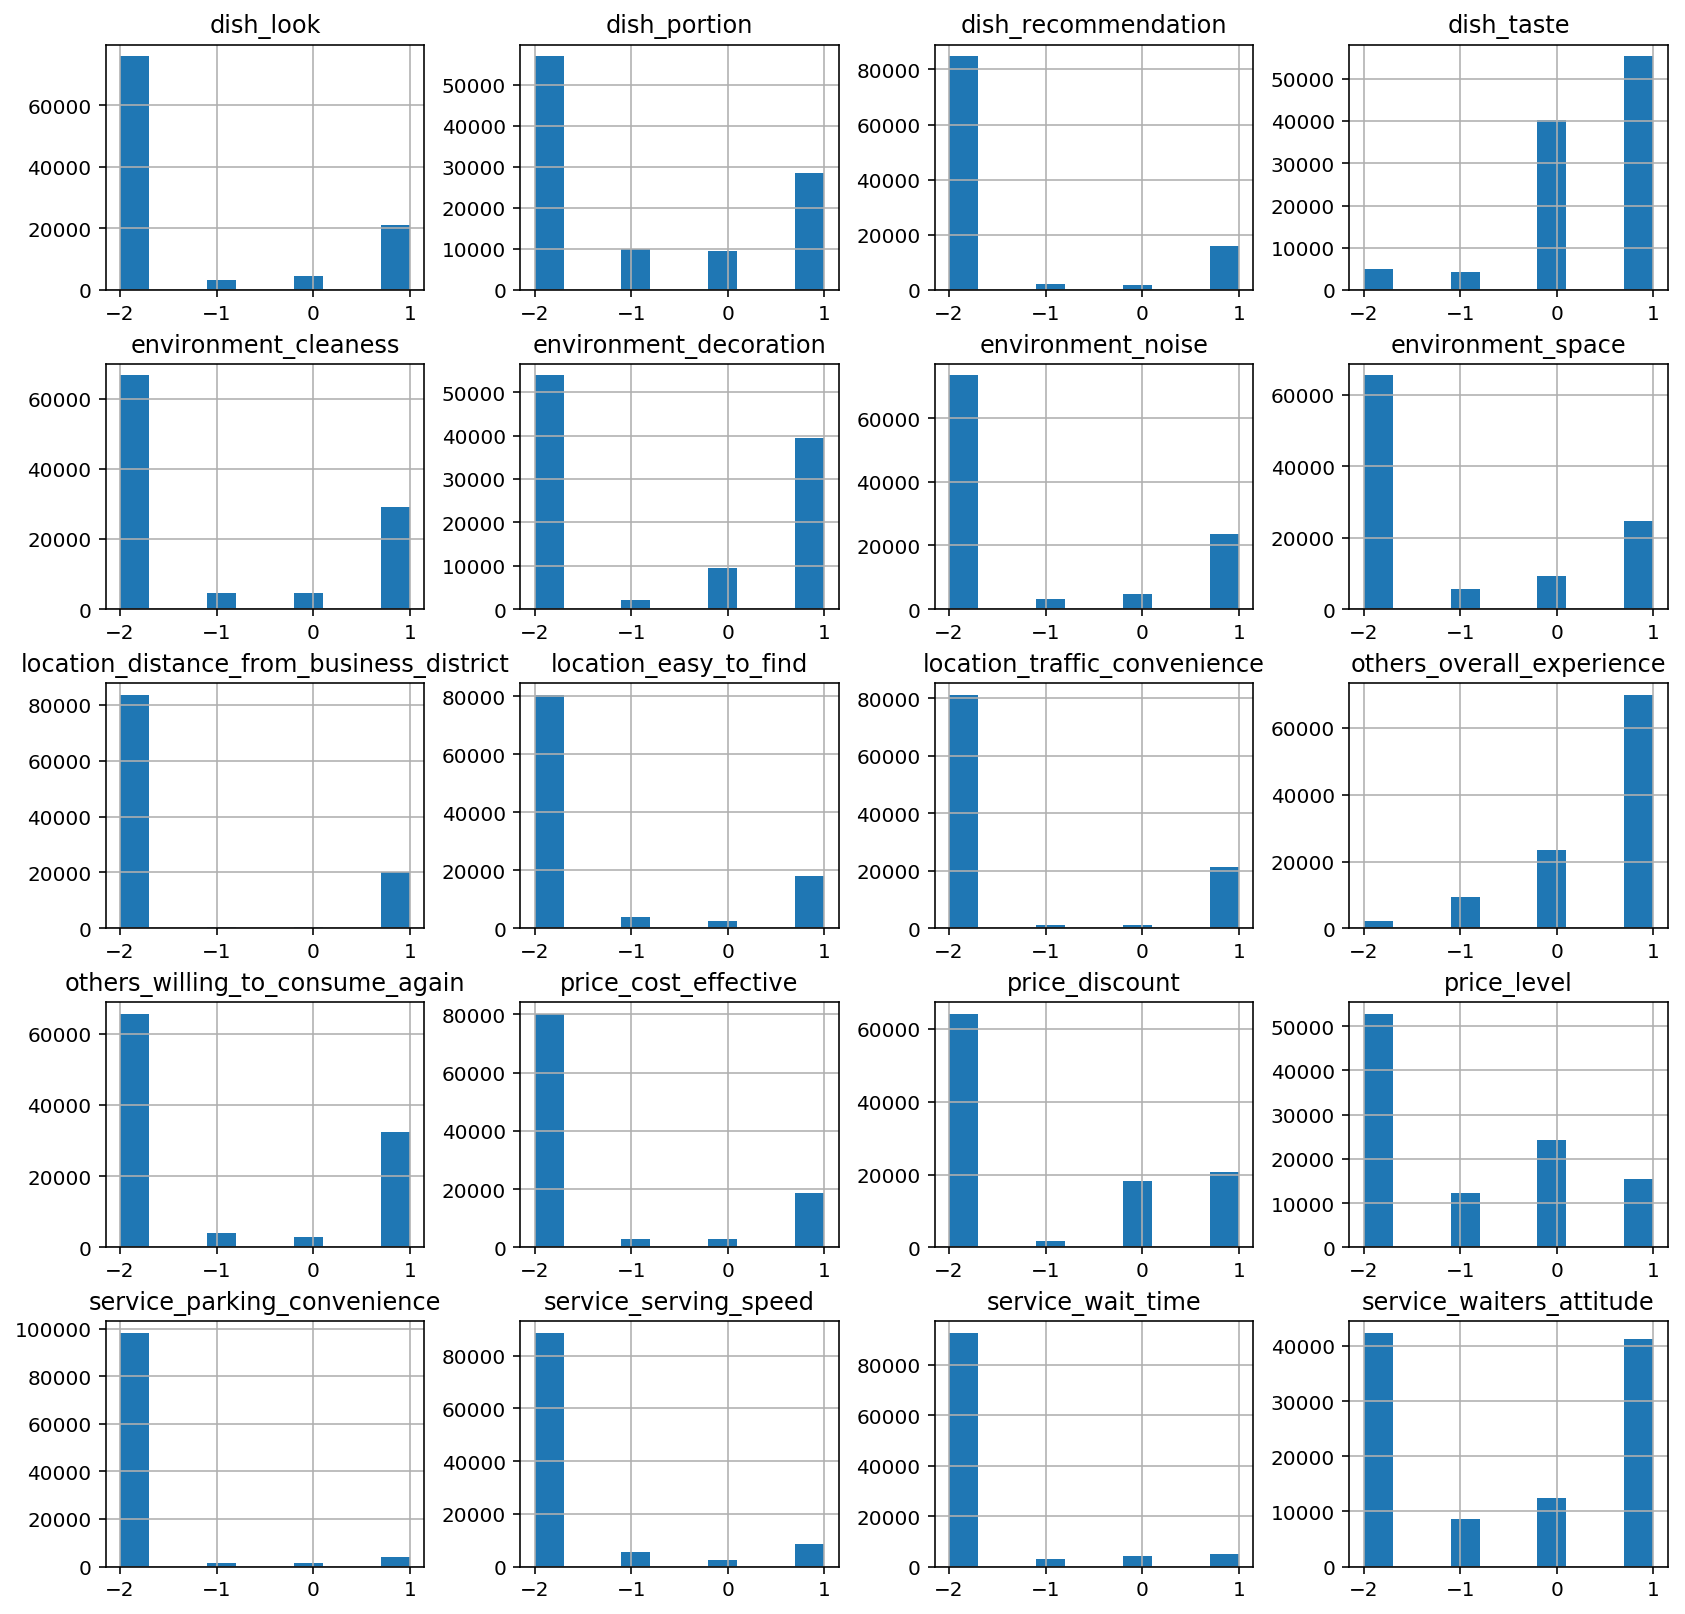

In [109]:
y_train.hist(figsize=(14, 14))
plt.show()

## Overall Distribution

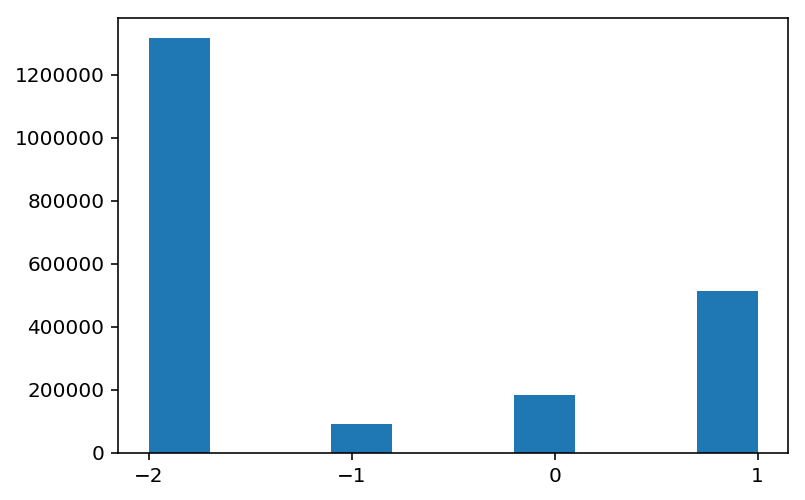

In [110]:
x = y_train.values.ravel()
plt.hist(x)
plt.xticks([-2, -1, 0, 1])
plt.show()